<a href="https://colab.research.google.com/github/bigrainlin/TensorFlow/blob/master/AI_ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
dest_path='/content/sample_data/eye_gender_data.zip', unzip=True)


Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1f7uslI-ZHidriQFZR966_aILjlkgDN76" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


### **Load Libraries**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
import datetime

### **Load and prepare training data**

In [3]:
from google.colab import files
uploaded = files.upload()

for n in uploaded.keys():
  print('User uploaded file "{name}" with lenght {length} bytes'.format(
      name = n, length = len(uploaded[n])
  ))

Saving eye_gender_data.zip to eye_gender_data.zip
User uploaded file "eye_gender_data.zip" with lenght 26794203 bytes


In [4]:
!unzip eye_gender_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: eye_gender_data/train/Image_4799.jpg  
  inflating: eye_gender_data/train/Image_48.jpg  
  inflating: eye_gender_data/train/Image_480.jpg  
  inflating: eye_gender_data/train/Image_4800.jpg  
  inflating: eye_gender_data/train/Image_4801.jpg  
  inflating: eye_gender_data/train/Image_4802.jpg  
  inflating: eye_gender_data/train/Image_4803.jpg  
  inflating: eye_gender_data/train/Image_4804.jpg  
  inflating: eye_gender_data/train/Image_4805.jpg  
  inflating: eye_gender_data/train/Image_4806.jpg  
  inflating: eye_gender_data/train/Image_4807.jpg  
  inflating: eye_gender_data/train/Image_4808.jpg  
  inflating: eye_gender_data/train/Image_4809.jpg  
  inflating: eye_gender_data/train/Image_481.jpg  
  inflating: eye_gender_data/train/Image_4810.jpg  
  inflating: eye_gender_data/train/Image_4811.jpg  
  inflating: eye_gender_data/train/Image_4812.jpg  
  inflating: eye_gender_data/train/Image_4813.jpg  
  inflating: eye_

In [5]:
labels = pd.read_csv("/content/eye_gender_data/Training_set.csv")
file_paths = [[fname, '/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns = ['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')



In [6]:
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/eye_gender_data/train/Image_1.jpg,male
1,Image_2.jpg,/content/eye_gender_data/train/Image_2.jpg,female
2,Image_3.jpg,/content/eye_gender_data/train/Image_3.jpg,female
3,Image_4.jpg,/content/eye_gender_data/train/Image_4.jpg,female
4,Image_5.jpg,/content/eye_gender_data/train/Image_5.jpg,male


In [7]:
# initalize an empty numpy array
data = []

# image size taken is 100 here. We can choose any size.
image_size = 100
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resize the image to (100, 100)
  data.append([new_img_array, train_data['label'][i]])


In [8]:
print(np.array(data).shape)

(9220, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [9]:
data[0]

[array([[188, 188, 189, ..., 176, 175, 175],
        [189, 189, 188, ..., 174, 173, 172],
        [190, 189, 188, ..., 168, 167, 167],
        ...,
        [133, 137, 144, ..., 168, 167, 166],
        [134, 138, 145, ..., 165, 164, 163],
        [135, 139, 146, ..., 163, 162, 162]], dtype=uint8), 'male']

### **Data Pre-processing**
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. We need to convert all the labels from categorical to numerical values.

In [10]:
data[1][1]

'female'

In [11]:
# replace male by 1 and femail by 0
for n in range(len(data)):
  if data[n][1] == 'male':
    data[n][1] = 1
  if data[n][1] == 'female':
    data[n][1] = 0

In [12]:
data[0]

[array([[188, 188, 189, ..., 176, 175, 175],
        [189, 189, 188, ..., 174, 173, 172],
        [190, 189, 188, ..., 168, 167, 167],
        ...,
        [133, 137, 144, ..., 168, 167, 166],
        [134, 138, 145, ..., 165, 164, 163],
        [135, 139, 146, ..., 163, 162, 162]], dtype=uint8), 1]

In [13]:
# Normalize the pixel values
for i in range(len(data)):
  data[i][0] = data[i][0] / 255.0

In [14]:
# seperate target variable from dataset
train_labels = []
for i in range(len(data)):
  train_labels.append(data[i][1])

In [15]:
# seperate feature veriables from dataset
train_images = []
for i in range(len(data)):
  train_images.append(data[i][0])

In [16]:
# transfer data type to numpy.array and reshape the size to meet the input requirement of CNN model
train_images = np.asarray(train_images)
train_images = train_images.reshape(train_images.shape[0], 100, 100, 1)

In [17]:
# transfer data type to numpy.array
train_labels = np.asarray(train_labels)

In [18]:
train_images.shape

(9220, 100, 100, 1)

In [19]:
train_labels.shape

(9220,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size= 0.3, random_state= 711)


### **Build model & Hyperparameter tuning**

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

In [29]:
# Define the Model
model = Sequential()
# define conv-pool layers - set 1
model.add(layers.Conv2D(filters = 32, kernel_size=(5,5), padding = 'same', activation = 'relu', input_shape = (100, 100, 1)))
model.add(layers.MaxPooling2D(pool_size = (10,10)))
# define conv-pool layers - set 2
model.add(layers.Conv2D(filters = 64, kernel_size=(5,5), padding = 'same', activation = 'relu', input_shape = (100, 100, 1)))
model.add(layers.MaxPooling2D(pool_size = (10,10)))
# add flatten layer
model.add(layers.Flatten())
# add dense layers with some dropout
model.add(layers.Dense(1024, activation = 'relu', name = 'hidden_1'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation = 'relu', name = "hidden_2"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation = 'relu', name = "hidden_3"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation = 'relu', name = "hidden_4"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation = 'softmax'))


In [30]:
model.compile(optimizer = 'adam',
              loss = 'SparseCategoricalCrossentropy',
              metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 hidden_1 (Dense)            (None, 1024)              6

In [31]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

### **Validate the model**

In [32]:
history = model.fit(x = X_train,
          y = y_train,
          batch_size = 200,
          epochs = 20,
          validation_split = 0.2,
          callbacks = [tensorboard_callback, earlystopping_callback],)

Epoch 1/20
26/26 [==============================] - 4s 111ms/step - loss: 0.6914 - accuracy: 0.5363 - val_loss: 0.6873 - val_accuracy: 0.5554
Epoch 2/20
26/26 [==============================] - 2s 80ms/step - loss: 0.6816 - accuracy: 0.5553 - val_loss: 0.6692 - val_accuracy: 0.6057
Epoch 3/20
26/26 [==============================] - 2s 88ms/step - loss: 0.6199 - accuracy: 0.6651 - val_loss: 0.5380 - val_accuracy: 0.7397
Epoch 4/20
26/26 [==============================] - 2s 87ms/step - loss: 0.5266 - accuracy: 0.7426 - val_loss: 0.4617 - val_accuracy: 0.7823
Epoch 5/20
26/26 [==============================] - 2s 82ms/step - loss: 0.4469 - accuracy: 0.7974 - val_loss: 0.3784 - val_accuracy: 0.8389
Epoch 6/20
26/26 [==============================] - 2s 87ms/step - loss: 0.4003 - accuracy: 0.8243 - val_loss: 0.4349 - val_accuracy: 0.7878
Epoch 7/20
26/26 [==============================] - 2s 81ms/step - loss: 0.3605 - accuracy: 0.8423 - val_loss: 0.3338 - val_accuracy: 0.8567
Epoch 8/20
2

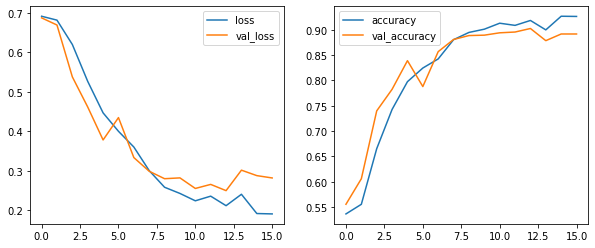

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

**Evaluate the model**

In [35]:
model.evaluate(X_test, y_test)

87/87 [==============================] - 1s 12ms/step - loss: 0.2447 - accuracy: 0.9027


[0.24467214941978455, 0.902747631072998]

## **Predict the output for testing dataset**

**Load test set**

In [36]:
test_images = pd.read_csv("/content/eye_gender_data/Testing_set.csv")
file_paths = [[fname, '/content/eye_gender_data/test/' + fname] for fname in labels['filename']]
images_test = pd.DataFrame(file_paths, columns = ['filename', 'filepaths'])
test_data = pd.merge(images_test, test_images, how = 'inner', on = 'filename')


In [37]:
test_data.head()

,filename,filepaths
0,Image_1.jpg,/content/eye_gender_data/test/Image_1.jpg
1,Image_2.jpg,/content/eye_gender_data/test/Image_2.jpg
2,Image_3.jpg,/content/eye_gender_data/test/Image_3.jpg
3,Image_4.jpg,/content/eye_gender_data/test/Image_4.jpg
4,Image_5.jpg,/content/eye_gender_data/test/Image_5.jpg


In [38]:
test_data.shape

(2305, 2)

In [39]:
# initalize an empty numpy array
data_test = []

# image size taken is 100 here. We can choose any size.
image_size = 100
for i in range(len(test_data)):
  img_array = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resize the image to (100, 100)
  data_test.append([new_img_array])

In [40]:
# transfer data type to numpy.array
data_test = np.asarray(data_test)

In [41]:
data_test[0]

array([[[140, 141, 142, ..., 169, 171, 173],
        [138, 138, 138, ..., 166, 168, 170],
        [137, 135, 134, ..., 163, 164, 166],
        ...,
        [146, 150, 155, ..., 151, 151, 151],
        [146, 151, 157, ..., 148, 147, 146],
        [147, 152, 158, ..., 147, 145, 143]]], dtype=uint8)

In [42]:
# Normalize the pixel values
data_test = data_test / 255.0

In [43]:
# reshape the size to meet the input requirement of CNN model
data_test = data_test.reshape(data_test.shape[0], 100, 100, 1)

In [44]:
# make sure data_test is ready for testing
data_test.shape

(2305, 100, 100, 1)

### **Make prediction on Test Dataset**

In [45]:
labels_test = model.predict(data_test)

In [48]:
labels_test[10:15]

array([[0.96791124, 0.03208878],
       [0.17556483, 0.8244352 ],
       [0.95028204, 0.04971796],
       [0.09945514, 0.9005449 ],
       [0.11324479, 0.8867552 ]], dtype=float32)

In [49]:
prediction = []
for i in range(len(labels_test)):
  if labels_test[i][1] > labels_test[i][0]:
    prediction += ["male"]
  else: prediction += ["female"]

In [50]:
prediction = np.asarray(prediction)

In [51]:
prediction[10:15]

array(['female', 'male', 'female', 'male', 'male'], dtype='<U6')

### **Save prediction results**

In [52]:
res = pd.DataFrame({'filename': test_images['filename'], 'label': prediction})
res.to_csv("submission.csv", index = False)

from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>